In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
df=pd.read_csv(r"C:\Users\MY Laptop\Desktop\guvi_class\Customer Conversion Analysis\train_data.csv")

In [21]:
import sklearn
print(sklearn.__version__)

1.5.1


In [22]:
df

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page
0,2008,6,22,21,Poland,15648,blouses,C,violet,top left,profile,48,1,2
1,2008,5,19,6,Poland,10018,skirts,B,violet,top right,en face,57,1,2
2,2008,7,15,2,Poland,19388,blouses,C,of many colors,bottom in the middle,en face,48,1,1
3,2008,5,2,2,Poland,7181,skirts,B,black,bottom left,en face,43,2,1
4,2008,6,9,16,Poland,13493,skirts,B,of many colors,bottom in the middle,en face,57,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132374,2008,7,4,3,Poland,17622,sale,P,black,top left,en face,48,1,2
132375,2008,6,19,9,Poland,15165,blouses,C,white,top right,en face,28,2,2
132376,2008,7,15,4,Poland,19359,trousers,A,blue,top in the middle,profile,38,2,1
132377,2008,7,28,16,Poland,21454,blouses,C,of many colors,bottom in the middle,profile,20,2,3


In [20]:
df['page'].unique()

array([2, 1, 3, 4, 5], dtype=int64)

In [2]:
country_mapping = {
    1:'Australia',
    2:'Austria',
    3:'Belgium',
    4:'British Virgin Islands',
    5:'Cayman Islands',
    6:'Christmas Island',
    7:'Croatia',
    8:'Cyprus',
    9:'Czech Republic',
    10:'Denmark',
    11:'Estonia',
    12:'unidentified',
    13:'Faroe Islands',
    14:'Finland',
    15:'France',
    16:'Germany',
    17:'Greece',
    18:'Hungary',
    19:'Iceland',
    20:'India',
    21:'Ireland',
    22:'Italy',
    23:'Latvia',
    24:'Lithuania',
    25:'Luxembourg',
    26:'Mexico',
    27:'Netherlands',
    28:'Norway',
    29:'Poland',
    30:'Portugal',
    31:'Romania',
    32:'Russia',
    33:'San Marino',
    34:'Slovakia',
    35:'Slovenia',
    36:'Spain',
    37:'Sweden',
    38:'Switzerland',
    39:'Ukraine',
    40:'United Arab Emirates',
    41:'United Kingdom',
    42:'USA',
    43:'biz (.biz)',
    44:'com (.com)',
    45:'int (.int)',
    46:'net (.net)',
    47:'org (*.org)'
}
page1={
    1:'trousers',
    2:'skirts',
    3:'blouses',
    4:'sale'
}

colors={
    1:'beige',
    2:'black',
    3:'blue',
    4:'brown',
    5:'burgundy',
    6:'gray',
    7:'green',
    8:'navy blue',
    9:'of many colors',
    10:'olive',
    11:'pink',
    12:'red',
    13:'violet',
    14:'white'
}

locations={
    1:'top left',
    2:'top in the middle',
    3:'top right',
    4:'bottom left',
    5:'bottom in the middle',
    6:'bottom right'

}

model_photo={
    1:'en face',
    2:'profile'

}

clothing_model={

    'C20':'C', 'B26':'B','C13':'C','B11':'B','B31':'B','C38':'C',
    'C24':'C','C45':'C','B24':'B','A11':'A','P39':'P','P18':'P','P16':'P','P11':'P','A3':'A','P1':'P','A13':'A',
    'C26':'C','B17':'B','A7':'A','C12':'C','A2':'A','P2':'P','P4':'P','C18':'C','P3':'P','P43':'P','C41':'C',
    'C10':'C','C25' :'C','P60' :'P','P77' :'P','C33' :'C','A10' :'A','B34' :'B','P8' :'P','A25':'A','A6' :'A','B10':'B',
    'P12':'P', 'A30':'A', 'C14':'C','C19':'C', 'C40':'C','A8' :'A','A21' :'A','A22' :'A','A5' :'A','C11':'C','A16' :'A',
    'A29' :'A','B20' :'A','C5' :'C','P55' :'P','P80' :'P','P51' :'P','B25' :'B','C35' :'C','C2' :'C','C17' :'C',
    'P14' :'P','P5':'P', 'A39':'A', 'C7':'C', 'P20':'P', 'P67':'P', 'P49':'P', 'P15':'P', 'C44':'C', 'A14':'A', 
    'C9':'C', 'P57':'P', 'P7':'P', 'A1':'A','A38':'A', 'B2':'B', 'P25':'P', 'B27':'B', 'P10':'P', 'P72':'P',
    'B32':'B', 'A33':'A', 'P17':'P', 'C54':'C', 'C56':'C', 'B4':'B','A4':'A', 'C27':'C', 'A15':'A', 'C4':'C',
    'A17':'A', 'A41':'A', 'P62':'P', 'A35':'A', 'P48' :'P','C46':'C', 'C6':'C', 'A18':'A','A37':'A', 'A12':'A',
    'P26':'P', 'P63':'P', 'B14':'B', 'C15':'C', 'P40':'P', 'A36':'A', 'B15':'B', 'P34':'P', 'A42':'A', 'C55':'C',
    'B21':'B', 'P61':'P', 'C8':'C', 'A9':'A', 'P33':'P', 'B8':'B', 'B23':'B', 'B1':'B', 'B13':'B', 'C53':'C', 
    'P29':'P', 'C16':'C', 'B6':'B','P73':'P', 'C50':'C', 'B16':'B', 'A20':'A', 'P42':'P', 'P74':'P', 'P35':'P',
    'A31':'A', 'A26':'A', 'B30':'B', 'P50':'P', 'A28':'A','A32':'A' ,'C59':'C', 'P75':'P', 'P70':'P', 'C48':'C', 
    'P47':'P', 'C58':'C', 'P6':'P', 'C51':'C', 'A27':'A', 'P68':'P','C21':'C', 'P38':'P', 'C32':'C', 'C30':'C', 'P23':'P', 'P9':'P',
    'P19':'P', 'P65':'P', 'C23':'C', 'B29':'B', 'B28':'B', 'B19':'B', 'C34':'C','C49':'C', 'C57':'C', 'P64':'P', 
    'B7':'B', 'C52':'C', 'P44':'P','P71':'P', 'P59':'P', 'A23':'A', 'P82':'P', 'P36':'P', 'B12':'B',
    'B33':'B', 'B9':'B', 'C1':'C', 'P32':'P', 'C42':'C', 'C36':'C', 'P30':'P', 'P37':'P', 'C43':'C', 'C39':'C', 
    'P56':'P', 'B3':'B','A34':'A', 'P76':'P', 'B22':'B', 'A43':'A', 'C3':'C', 'P13':'P', 'B5':'B', 'C28':'C',
    'A40':'A', 'C22':'C', 'C47':'C', 'C29':'C','P24':'P', 'A24':'A', 'P58':'P', 'A19':'A', 'P53':'P', 'C37':'C', 
    'P46':'P', 'P69':'P', 'C31':'C', 'P45':'P', 'P52':'P', 'P78':'P','P21':'P', 'P81':'P', 'P41':'P', 'P66':'P', 
    'P27':'P', 'P31' :'P','P79' :'P','P22':'P', 'P54':'P'
}

df['country']=df['country'].replace(country_mapping)
df['page1_main_category']=df['page1_main_category'].replace(page1)
df['colour']=df['colour'].replace(colors)
df['location']=df['location'].replace(locations)
df['model_photography']=df['model_photography'].replace(model_photo)
df['page2_clothing_model']=df['page2_clothing_model'].replace(clothing_model)
allowed_countries = ['Poland', 'Czech Republic', 'Lithuania', 'net (.net)', 'com (.com)']
df['country'] = df['country'].where(df['country'].isin(allowed_countries), 'Others')

df=pd.get_dummies(df,columns=['country',
'page1_main_category',
'colour',
'location',
'model_photography','page2_clothing_model'],
dtype='int')
scaler = MinMaxScaler()
stdscaler=StandardScaler()
df["month"] = scaler.fit_transform(df[["month"]])
df["day"] = stdscaler.fit_transform(df[["day"]])
df["order"] = stdscaler.fit_transform(df[["order"]])

# Regression model

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression ,Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
import numpy as np

X=df.drop(['price','price_2','session_id'],axis=1)
y=df['price']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
models = [LinearRegression(),Lasso(),Ridge(alpha=1.0),GradientBoostingRegressor(n_estimators=50,max_depth=5,learning_rate=0.1)]
  
for model in models:
    model.fit(x_train,y_train)
    train_pred=model.predict(x_train)
    test_pred=model.predict(x_test)
    print(f"****{type(model).__name__}*******")
    
    print(f"MAE for Training Data : {mean_absolute_error(y_train,train_pred)}")
    print(f"MAE for Test data: {mean_absolute_error(y_test,test_pred)}")

    print("RMSE for training data", np.sqrt(mean_squared_error(y_train, train_pred)))
    print("RMSE for test data", np.sqrt(mean_squared_error(y_test, test_pred)))
   
    print(f"MSE for Training Data : {mean_squared_error(y_train,train_pred)}")
    print(f"MSE for Test data: {mean_squared_error(y_test,test_pred)}")

    print(f"R2 score for train data: {r2_score(y_train,train_pred)}")
    print(f"R2 score for test data: {r2_score(y_test,test_pred)}") 


****LinearRegression*******
MAE for Training Data : 8.527210004379008
MAE for Test data: 8.4212391056995
RMSE for training data 10.137372335096039
RMSE for test data 10.030294686559904
MSE for Training Data : 102.76631786037053
MSE for Test data: 100.60681149923184
R2 score for train data: 0.3473785452843162
R2 score for test data: 0.35634258249147244
****Lasso*******
MAE for Training Data : 9.58055591634532
MAE for Test data: 9.503181434644357
RMSE for training data 11.833227534708568
RMSE for test data 11.765273816216913
MSE for Training Data : 140.025273888185
MSE for Test data: 138.42166797055927
R2 score for train data: 0.11076411177801582
R2 score for test data: 0.1144125133730799
****Ridge*******
MAE for Training Data : 8.473285425671254
MAE for Test data: 8.368908850375297
RMSE for training data 10.11335695138864
RMSE for test data 10.006232056618705
MSE for Training Data : 102.27998882620095
MSE for Test data: 100.12467997090381
R2 score for train data: 0.35046699652357804
R2 

# hyperparameter tuning

In [32]:
from sklearn.model_selection import GridSearchCV

rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15,None],
    'learning_rate':[0.1]
}

rf_model = GradientBoostingRegressor()
grid_rf = GridSearchCV(rf_model, rf_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(x_train,y_train)
print("Best Gradient Boosting Parameters:", grid_rf.best_params_)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best Gradient Boosting Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}


###### Best Gradient Boosting Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}

# classification model

In [3]:

X=df.drop(['price_2'],axis=1)
y=df['price_2']

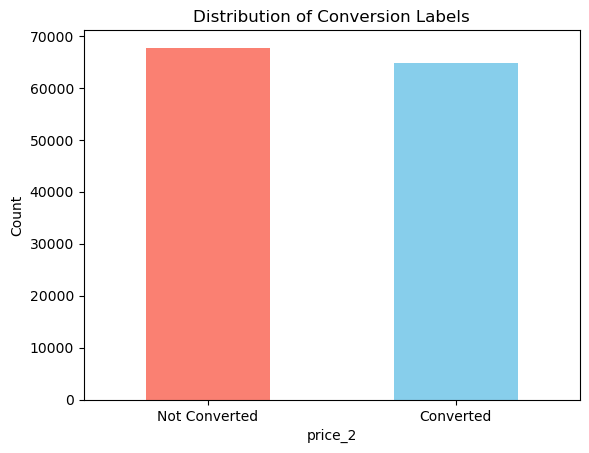

In [4]:

import matplotlib.pyplot as plt
count=y.value_counts()
count.plot(kind='bar', color=['salmon', 'skyblue'])
plt.title('Distribution of Conversion Labels')
plt.xticks(ticks=[0,1], labels=['Not Converted', 'Converted'], rotation=0)
plt.ylabel('Count')
plt.show()


In [16]:
percentages = y.value_counts(normalize=True) * 100
print(percentages)


price_2
1    51.151618
2    48.848382
Name: proportion, dtype: float64


In [35]:
from sklearn.model_selection import train_test_split
X=df.drop(['price_2','price','session_id'],axis=1)
y=df['price_2']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

### undersampling

In [17]:
from imblearn.under_sampling import RandomUnderSampler

# Before
print("Original class distribution:", Counter(y_train))

# Apply Undersampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(x_train, y_train)

# After
print("Resampled class distribution:", Counter(y_resampled))


Original class distribution: Counter({1: 54254, 2: 51649})
Resampled class distribution: Counter({1: 51649, 2: 51649})


### oversampling

In [9]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Before
print("Original class distribution:", Counter(y_train))

# Apply Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(x_train, y_train)

# After
print("Resampled class distribution:", Counter(y_resampled))

Original class distribution: Counter({1: 54178, 2: 54164})
Resampled class distribution: Counter({2: 54178, 1: 54178})


### SMOTE oversampling

In [36]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_smoteresampled, y_smoteresampled = smote.fit_resample(X, y)

print("Resampled class distribution with SMOTE:", Counter(X_smoteresampled))


Resampled class distribution with SMOTE: Counter({'year': 1, 'month': 1, 'day': 1, 'order': 1, 'page': 1, 'country_Czech Republic': 1, 'country_Lithuania': 1, 'country_Others': 1, 'country_Poland': 1, 'country_com (.com)': 1, 'country_net (.net)': 1, 'page1_main_category_blouses': 1, 'page1_main_category_sale': 1, 'page1_main_category_skirts': 1, 'page1_main_category_trousers': 1, 'colour_beige': 1, 'colour_black': 1, 'colour_blue': 1, 'colour_brown': 1, 'colour_burgundy': 1, 'colour_gray': 1, 'colour_green': 1, 'colour_navy blue': 1, 'colour_of many colors': 1, 'colour_olive': 1, 'colour_pink': 1, 'colour_red': 1, 'colour_violet': 1, 'colour_white': 1, 'location_bottom in the middle': 1, 'location_bottom left': 1, 'location_bottom right': 1, 'location_top in the middle': 1, 'location_top left': 1, 'location_top right': 1, 'model_photography_en face': 1, 'model_photography_profile': 1, 'page2_clothing_model_A': 1, 'page2_clothing_model_B': 1, 'page2_clothing_model_C': 1, 'page2_clothin

##### Training model without balaning

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
y_train = y_train.replace({1: 0, 2: 1})
y_test = y_test.replace({1: 0, 2: 1})
models = [LogisticRegression(max_iter=1000),DecisionTreeClassifier(),RandomForestClassifier(),XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)]
for model in models:
    model.fit(x_train,y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    print(f"****{type(model).__name__}*******")
    print("****Train******")
    print(f"Accuracy: {accuracy_score(y_train,train_pred)}")
    print(f"Precision: {precision_score(y_train,train_pred)}")
    print(f"Recall: {recall_score(y_train,train_pred)}")
    print(f"F1 score: {f1_score(y_train,train_pred)}")
    print(f"ROC AUC: {roc_auc_score(y_train,train_pred)}")
    print("*****Test******")
    print(f"Accuracy: {accuracy_score(y_test,test_pred)}")
    print(f"Precision: {precision_score(y_test,test_pred)}")
    print(f"Recall: {recall_score(y_test,test_pred)}")
    print(f"F1 score: {f1_score(y_test,test_pred)}")
    print(f"ROC AUC: {roc_auc_score(y_test,test_pred)}")

    fpr, tpr, _ = roc_curve(y_test, test_probs)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

    # ROC Curve Final Touches
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC-AUC Curve Comparison")
    plt.legend(loc='lower right')
    plt.grid()
    plt.tight_layout()
    plt.show()


****LogisticRegression*******
****Train******
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
ROC AUC: 1.0
*****Test******
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
ROC AUC: 1.0
****DecisionTreeClassifier*******
****Train******
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
ROC AUC: 1.0
*****Test******
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
ROC AUC: 1.0
****RandomForestClassifier*******
****Train******
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
ROC AUC: 1.0
*****Test******
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
ROC AUC: 1.0


C:\Users\MY Laptop\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [01:04:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


****XGBClassifier*******
****Train******
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
ROC AUC: 1.0
*****Test******
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
ROC AUC: 1.0
****MLPClassifier*******
****Train******
Accuracy: 0.9991879361302324
Precision: 0.9983439245137685
Recall: 1.0
F1 score: 0.9991712760421686
ROC AUC: 0.9992045727815905
*****Test******
Accuracy: 0.9990557486025079
Precision: 0.9980538689086097
Recall: 1.0
F1 score: 0.9990259866754977
ROC AUC: 0.9990845844013182


##### Training model with oversampling

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score


models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier()]
for model in models:
    model.fit(X_resampled,y_resampled)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    print(f"****{type(model).__name__}*******")
    print("****Train******")
    print(f"Accuracy: {accuracy_score(y_train,train_pred)}")
    print(f"Precision: {precision_score(y_train,train_pred)}")
    print(f"Recall: {recall_score(y_train,train_pred)}")
    print(f"F1 score: {f1_score(y_train,train_pred)}")

    print("*****Test******")
    print(f"Accuracy: {accuracy_score(y_test,test_pred)}")
    print(f"Precision: {precision_score(y_test,test_pred)}")
    print(f"Recall: {recall_score(y_test,test_pred)}")
    print(f"F1 score: {f1_score(y_test,test_pred)}")
   



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****LogisticRegression*******
****Train******
Accuracy: 0.9936073576763642
Precision: 0.9939026643509109
Recall: 0.9935905724154491
F1 score: 0.9937465938796057
*****Test******
Accuracy: 0.9933524701616558
Precision: 0.993881312200516
Recall: 0.9931491712707182
F1 score: 0.993515106853353
****DecisionTreeClassifier*******
****Train******
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
*****Test******
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
****RandomForestClassifier*******
****Train******
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
*****Test******
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


### model with smote 

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
x_train,x_test,y_train,y_test = train_test_split(X_smoteresampled,y_smoteresampled,test_size=0.2)
y_train = y_train.replace({1: 0, 2: 1})
y_test = y_test.replace({1: 0, 2: 1})
models = [LogisticRegression(max_iter=1000),DecisionTreeClassifier(),RandomForestClassifier(),XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)]
for model in models:
    model.fit(x_train,y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    print(f"****{type(model).__name__}*******")
    print("****Train******")
    print(f"Accuracy: {accuracy_score(y_train,train_pred)}")
    print(f"Precision: {precision_score(y_train,train_pred)}")
    print(f"Recall: {recall_score(y_train,train_pred)}")
    print(f"F1 score: {f1_score(y_train,train_pred)}")
    print(f"ROC AUC: {roc_auc_score(y_train,train_pred)}")
    print("*****Test******")
    print(f"Accuracy: {accuracy_score(y_test,test_pred)}")
    print(f"Precision: {precision_score(y_test,test_pred)}")
    print(f"Recall: {recall_score(y_test,test_pred)}")
    print(f"F1 score: {f1_score(y_test,test_pred)}")
    print(f"ROC AUC: {roc_auc_score(y_test,test_pred)}")

   



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****LogisticRegression*******
****Train******
Accuracy: 0.6757767070942017
Precision: 0.6958155281682872
Recall: 0.6230544567266812
F1 score: 0.6574279054798662
ROC AUC: 0.6757057550206668
*****Test******
Accuracy: 0.6730414236136749
Precision: 0.6967917975855796
Recall: 0.6189042303172738
F1 score: 0.6555425904317386
ROC AUC: 0.6733348174600474
****DecisionTreeClassifier*******
****Train******
Accuracy: 0.9761588303704934
Precision: 0.988210542277147
Recall: 0.9637509704610152
F1 score: 0.9758275077907859
ROC AUC: 0.9761421322329411
*****Test******
Accuracy: 0.9201063279923207
Precision: 0.9302675082657048
Recall: 0.9092244418331374
F1 score: 0.9196256128361313
ROC AUC: 0.920165301837133
****RandomForestClassifier*******
****Train******
Accuracy: 0.9761588303704934
Precision: 0.9779022951184667
Recall: 0.9742689193685534
F1 score: 0.9760822260289829
ROC AUC: 0.9761562869831485
*****Test******
Accuracy: 0.9205124418518792
Precision: 0.9252801068487052
Recall: 0.915834312573443
F1 score

C:\Users\MY Laptop\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [22:56:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


****XGBClassifier*******
****Train******
Accuracy: 0.9352790238319396
Precision: 0.9366769299254368
Recall: 0.9334910717586602
F1 score: 0.935081287264378
ROC AUC: 0.93527661765796
*****Test******
Accuracy: 0.9322528243372961
Precision: 0.9363656567153122
Recall: 0.9283196239717979
F1 score: 0.9323252812096625
ROC AUC: 0.9322741401224989
****MLPClassifier*******
****Train******
Accuracy: 0.9243691273928855
Precision: 0.9219893362750505
Recall: 0.9269658767422085
F1 score: 0.9244709092249834
ROC AUC: 0.9243726220227525
*****Test******
Accuracy: 0.9233552388687883
Precision: 0.9246393876950251
Recall: 0.922737955346651
F1 score: 0.9236876929863256
ROC AUC: 0.923358584206362


clustering model

In [23]:
df

,year,month,day,order,session_id,price,page,country_Czech Republic,country_Lithuania,country_Others,...,location_bottom right,location_top in the middle,location_top left,location_top right,model_photography_en face,model_photography_profile,page2_clothing_model_A,page2_clothing_model_B,page2_clothing_model_C,page2_clothing_model_P
0,2008,0.50,0.848597,0.831323,15648,48,2,0,0,0,...,0,0,1,0,0,1,0,0,1,0
1,2008,0.25,0.508811,-0.283182,10018,57,2,0,0,0,...,0,0,0,1,1,0,0,1,0,0
2,2008,0.75,0.055762,-0.580383,19388,48,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,2008,0.25,-1.416646,-0.580383,7181,43,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,2008,0.50,-0.623811,0.459822,13493,57,2,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132374,2008,0.75,-1.190122,-0.506083,17622,48,2,0,0,0,...,0,0,1,0,1,0,0,0,0,1
132375,2008,0.50,0.508811,-0.060281,15165,28,2,0,0,0,...,0,0,0,1,1,0,0,0,1,0
132376,2008,0.75,0.055762,-0.431783,19359,38,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
132377,2008,0.75,1.528171,0.459822,21454,20,3,0,0,0,...,0,0,0,0,0,1,0,0,1,0


# cluster model bulding

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import KMeans,DBSCAN, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

In [4]:
X = df.drop(['price_2', 'price','session_id'], axis=1)

In [6]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
model = PCA(n_components=3)
transformed_data = model.fit_transform(X)
transformed_data = pd.DataFrame(transformed_data,columns=['PCA1','PCA2','PCA3'] )
model.explained_variance_ratio_

array([0.09479035, 0.07881727, 0.07248662])

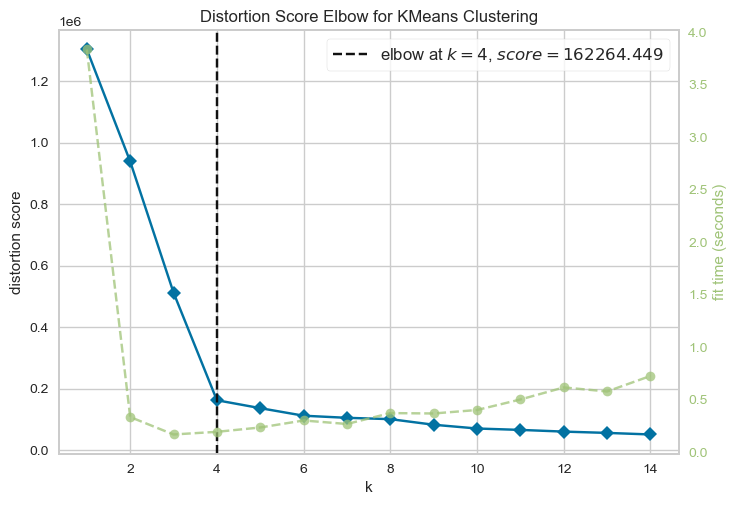

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
model = KMeans()
vis = KElbowVisualizer(model,k = (1,15))
vis.fit(transformed_data)
vis.show()

In [ ]:
model = KMeans(n_clusters=4,random_state=42)
model.fit(transformed_data)
silhouette_score(transformed_data,model.labels_)

: 

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_pca)
if len(set(dbscan_labels)) > 1 and -1 not in set(dbscan_labels):
    dbscan_score = silhouette_score(X_pca, dbscan_labels)
else:
    dbscan_score = 'Not applicable'

print(dbscan_score)